<a href="https://colab.research.google.com/github/DinoManJp/Science-Research/blob/main/Solar%20Magnetohydrodynamics%20Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Magnetohydrodynamics

Sun Magnetohydrodynamics

<ipython-input-7-9ade06faca5b>:36: RuntimeWarning: overflow encountered in multiply
  flux_energy = v * (energy + p)
<ipython-input-7-9ade06faca5b>:41: RuntimeWarning: overflow encountered in subtract
  e[1:-1] -= dt / dx * (flux_energy[2:] - flux_energy[:-2])
<ipython-input-7-9ade06faca5b>:33: RuntimeWarning: overflow encountered in multiply
  energy = e + 0.5 * rho * v**2 + 0.5 * (Bx**2 + By**2)
<ipython-input-7-9ade06faca5b>:35: RuntimeWarning: overflow encountered in multiply
  flux_momentum = momentum * v + p + 0.5 * (Bx**2 + By**2)
<ipython-input-7-9ade06faca5b>:41: RuntimeWarning: invalid value encountered in subtract
  e[1:-1] -= dt / dx * (flux_energy[2:] - flux_energy[:-2])
<ipython-input-7-9ade06faca5b>:44: RuntimeWarning: invalid value encountered in divide
  v = momentum / rho


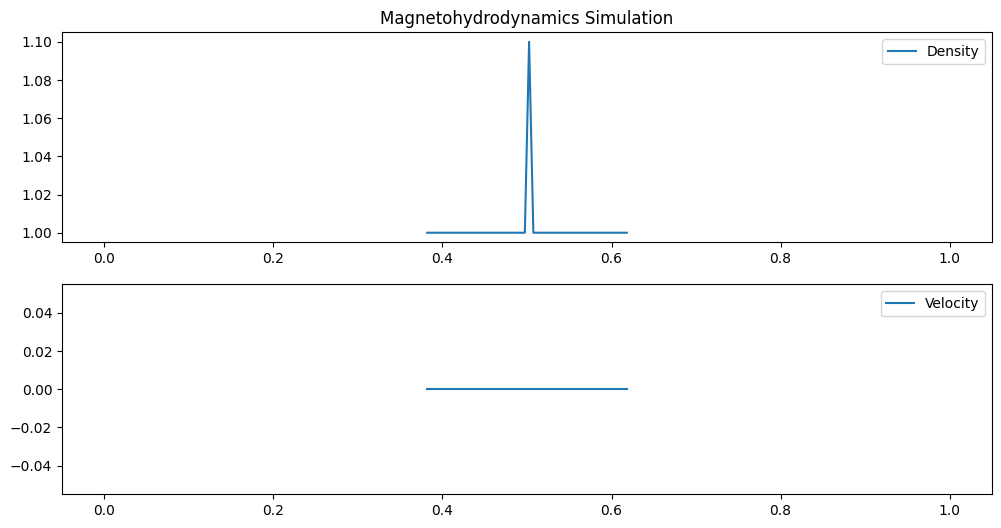

In [7]:
# Magnetohydrodynamics Simulation in 1D (Python)

import numpy as np
import matplotlib.pyplot as plt

# Constants
gamma = 1.4  # Adiabatic index
nx = 200     # Number of grid points
x_min, x_max = 0, 1
dx = (x_max - x_min) / nx
dt = 0.001   # Time step
t_max = 0.1  # Total simulation time

# Initialize variables
rho = np.ones(nx)  # Density
v = np.zeros(nx)   # Velocity
p = np.ones(nx)    # Pressure
Bx = np.zeros(nx)  # Magnetic field x-component
By = np.ones(nx)   # Magnetic field y-component

# Add perturbation
rho[nx//2] += 0.1

# Derived variables
e = p / (gamma - 1)  # Internal energy
Bx[1:-1] = 1.0       # Uniform magnetic field

# Simulation loop
time = 0
while time < t_max:
    # Compute fluxes
    momentum = rho * v
    energy = e + 0.5 * rho * v**2 + 0.5 * (Bx**2 + By**2)
    flux_mass = momentum
    flux_momentum = momentum * v + p + 0.5 * (Bx**2 + By**2)
    flux_energy = v * (energy + p)

    # Update variables using finite difference (explicit method)
    rho[1:-1] -= dt / dx * (flux_mass[2:] - flux_mass[:-2])
    momentum[1:-1] -= dt / dx * (flux_momentum[2:] - flux_momentum[:-2])
    e[1:-1] -= dt / dx * (flux_energy[2:] - flux_energy[:-2])

    # Update velocity, pressure
    v = momentum / rho
    p = (gamma - 1) * e

    # Update time
    time += dt

# Plot results
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(np.linspace(x_min, x_max, nx), rho, label="Density")
plt.title("Magnetohydrodynamics Simulation")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(np.linspace(x_min, x_max, nx), v, label="Velocity")
plt.legend()

plt.show()

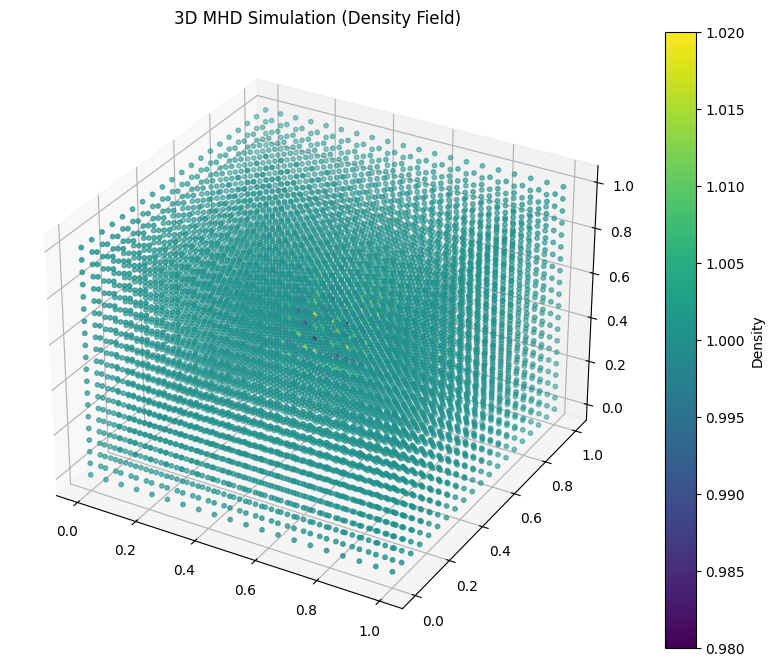

In [8]:
# Magnetohydrodynamics Simulation in 3D (Python)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
gamma = 1.4  # Adiabatic index
nx, ny, nz = 20, 20, 20  # Grid size
x_min, x_max = 0, 1
y_min, y_max = 0, 1
z_min, z_max = 0, 1
dx = (x_max - x_min) / nx
dy = (y_max - y_min) / ny
dz = (z_max - z_min) / nz
dt = 0.001   # Time step
t_max = 0.1  # Total simulation time

# Initialize variables
rho = np.ones((nx, ny, nz))  # Density
v = np.zeros((nx, ny, nz, 3))  # Velocity (3 components)
p = np.ones((nx, ny, nz))  # Pressure
Bx = np.zeros((nx, ny, nz))  # Magnetic field x-component
By = np.zeros((nx, ny, nz))  # Magnetic field y-component
Bz = np.zeros((nx, ny, nz))  # Magnetic field z-component

# Add perturbation in the center
rho[nx//2, ny//2, nz//2] += 0.1

# Simulation loop
time = 0
while time < t_max:
    # Compute fluxes (simplified)
    momentum = rho[..., np.newaxis] * v
    energy = p / (gamma - 1) + 0.5 * rho * (v[..., 0]**2 + v[..., 1]**2 + v[..., 2]**2)
    flux_mass = momentum
    flux_energy = np.sum(v * energy[..., np.newaxis], axis=-1)

    # Update variables using finite difference (explicit method)
    rho[1:-1, 1:-1, 1:-1] -= dt * (
        (rho[2:, 1:-1, 1:-1] - rho[:-2, 1:-1, 1:-1]) / (2 * dx) +
        (rho[1:-1, 2:, 1:-1] - rho[1:-1, :-2, 1:-1]) / (2 * dy) +
        (rho[1:-1, 1:-1, 2:] - rho[1:-1, 1:-1, :-2]) / (2 * dz)
    )

    # Update time
    time += dt

# Visualize the density field in 3D
x = np.linspace(x_min, x_max, nx)
y = np.linspace(y_min, y_max, ny)
z = np.linspace(z_min, z_max, nz)
X, Y, Z = np.meshgrid(x, y, z, indexing="ij")

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scat = ax.scatter(X, Y, Z, c=rho.flatten(), cmap="viridis", s=10)
plt.colorbar(scat, ax=ax, label="Density")
ax.set_title("3D MHD Simulation (Density Field)")
plt.show()


In [9]:
import numpy as np
import plotly.graph_objects as go

# Data from the previous simulation
x = np.linspace(x_min, x_max, nx)
y = np.linspace(y_min, y_max, ny)
z = np.linspace(z_min, z_max, nz)
X, Y, Z = np.meshgrid(x, y, z, indexing="ij")
rho_flat = rho.flatten()

# Create a scatter plot in 3D
fig = go.Figure(data=go.Scatter3d(
    x=X.flatten(),
    y=Y.flatten(),
    z=Z.flatten(),
    mode='markers',
    marker=dict(
        size=3,
        color=rho_flat,
        colorscale='Viridis',
        opacity=0.8,
        colorbar=dict(title="Density")
    )
))

fig.update_layout(
    title="3D MHD Simulation (Interactive)",
    scene=dict(
        xaxis_title="X",
        yaxis_title="Y",
        zaxis_title="Z"
    )
)

fig.show()
